## PAIR PROGRAMMING - ESTADÍSTICA 3

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st

### Objetivos:

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    - Tabla de contingencia
    - Coeficiente de correlación de las variables numéricas del dataset.
    - Sesgos de alguna de las variables numéricas del dataset.
    - Intervalo de confianza de algunas de las variables numéricas del dataset

In [2]:
df_exams = pd.read_csv('datos/exams.csv')
df_exams.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87


In [3]:
df_exams.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
df_exams_crosstab = pd.crosstab(df_exams['gender'], 
                            df_exams['race/ethnicity']) 
df_exams_crosstab

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,41,112,151,118,70
male,38,86,172,139,73


In [28]:
df_group = df_exams.groupby(['gender', 'race/ethnicity'])['math score'].count().reset_index()
df_group.head(10)

,gender,race/ethnicity,math score
0,female,group A,41
1,female,group B,112
2,female,group C,151
3,female,group D,118
4,female,group E,70
5,male,group A,38
6,male,group B,86
7,male,group C,172
8,male,group D,139
9,male,group E,73


In [30]:
df_group_nota_media = df_exams.groupby('gender')['math score'].mean()
df_group_nota_media

gender
female    64.77439
male      70.75000
Name: math score, dtype: float64

In [31]:
df_group_nota_media1 = df_exams.groupby('gender')['writing score'].mean()
df_group_nota_media1

gender
female    73.439024
male      64.976378
Name: writing score, dtype: float64

In [32]:
df_group_nota_media2 = df_exams.groupby('gender')['reading score'].mean()
df_group_nota_media2

gender
female    73.473577
male      67.387795
Name: reading score, dtype: float64

In [26]:
df_exams['Tanto por uno'] = df_exams['math score'] /df_exams['math score'].sum()
df_exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Tanto por uno
0,female,group D,some college,standard,completed,59,70,78,0.000870
1,male,group D,associate's degree,standard,none,96,93,87,0.001416
2,female,group D,some college,free/reduced,none,57,76,77,0.000841
3,male,group B,some college,free/reduced,none,70,70,63,0.001032
4,female,group D,associate's degree,standard,none,83,85,86,0.001224


In [7]:
matriz_correlacion_exams1 = np.corrcoef(df_exams['math score'], df_exams['reading score'])
matriz_correlacion_exams1

array([[1.        , 0.81176708],
       [0.81176708, 1.        ]])

In [6]:
matriz_correlacion_exams2 = np.corrcoef(df_exams['writing score'], df_exams['reading score'])
matriz_correlacion_exams2

array([[1.        , 0.94890882],
       [0.94890882, 1.        ]])

/tmp/ipykernel_28100/2159276830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_exams['math score'], color = 'red', kde = True)


<AxesSubplot:xlabel='math score', ylabel='Density'>

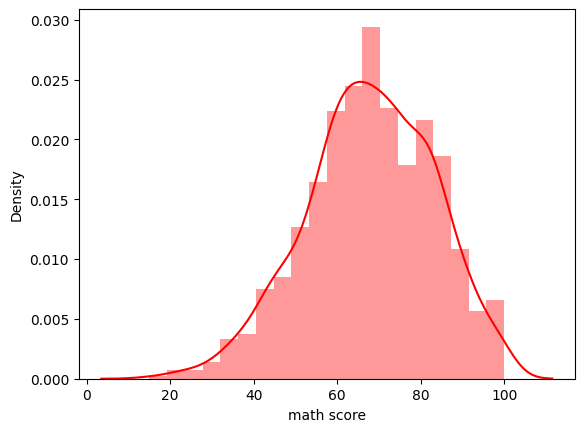

In [10]:
sns.distplot(df_exams['math score'], color = 'red', kde = True)

In [13]:
skewness = skew (df_exams['math score'])
skewness

-0.2807784564250463

/tmp/ipykernel_28100/3228315173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_exams['writing score'], color = 'green', kde = True)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

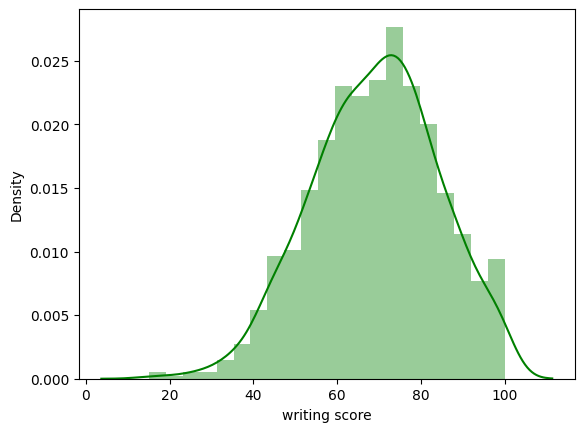

In [21]:
sns.distplot(df_exams['writing score'], color = 'green', kde = True)

In [22]:
skewness1 = skew (df_exams['writing score'])
skewness1

-0.21425190556515425

In [18]:
# Intervalo de confianza para la variable math score

datos = df_exams['math score']

print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

print(np.mean(datos))

(66.86365390071711, 68.7563460992829)
67.81


/tmp/ipykernel_28100/3972562140.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))


In [23]:
# Intervalo de confianza para la variable writing score

datos1 = df_exams['writing score']

print(st.t.interval(alpha=0.95, df=len(datos1)-1, loc=np.mean(datos1), scale=st.sem(datos1)))

print(np.mean(datos1))

(68.20757145134102, 70.07242854865898)
69.14


/tmp/ipykernel_28100/181040237.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos1)-1, loc=np.mean(datos1), scale=st.sem(datos1)))


2. Interpretación de los resultados.

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

## CONCLUSIONES:

- En lo relacionado con las variables categóricas seleccionadas (género y etnia)
observamos que el grupo C es el mayoritario en el muestrario en ambos géneros. 

- Se puede ver también que el grupo minoritario es el grupo A. Vemos que en pequeñas cantidades, pero predomina más el género masculino.
- Nos interesaba conocer los resultados de las diferentes materias por género y hemos visto que en matemáticas los hombres/chicos obtienen resultados más elevados que las mujeres.
  
- Sin embargo, en aquellas materias relacionadas más con la expresión escrita y comprensión lectora, son ellas las que más destacan.

- En lo que respecta a la correlación, es mayor que 0 en los casos estudiados, lo que significa
que es positiva y muy alta. Esto quiere decir, que si una aumenta, la otra también.

- En cuanto a los sesgos, vemos en la gráfica que la cola está en la parte izquierda, lo que significa que el sesgo es negativo y están sesgados a la izquierda.
  
- En cuanto al intervalo de confianza, observamos que es más o menos similar en cuanto amplitud para las variables numéricas estudiadas y que la media se encuentra contenida en ellos, y que el de una de las variables es más alto que el de otra (redacción)
  
     - intervalo confianza para matemáticas : 66.86 - 68-75 media: 67.81
     - intervalo confianza para writing: 68.20 - 70.072 media: 69.14